In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
DIR='/Users/ravali/Desktop/anamoly/Data'
df1 = pd.read_csv(DIR+'/temp.csv', delimiter=',')
display(df1)

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551
5,2013-07-04 05:00:00,70.060966
6,2013-07-04 06:00:00,69.279765
7,2013-07-04 07:00:00,69.369608
8,2013-07-04 08:00:00,69.166714
9,2013-07-04 09:00:00,68.986083


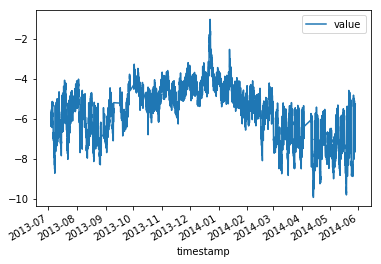

In [8]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1['value'] = (df1['value'] - 32) * 5/9
df1.plot(x='timestamp', y='value')

In [43]:
# feature engineering
df1['hr'] = df1['timestamp'].dt.hour
df1['dl'] = ((df1['hr'] >= 7) & (df1['hr'] <= 22)).astype(int)
df1['time1'] = (df1['timestamp'].astype(np.int64)/100000000000).astype(np.int64)
df1['WeekDay'] = (df1['Dof'] < 5).astype(int)
df1['Dof'] = df1['timestamp'].dt.dayofweek

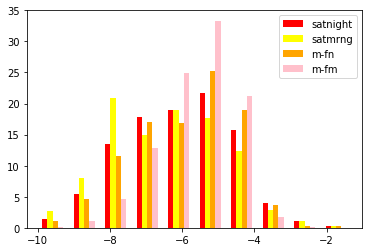

In [48]:
df1['categories'] = df1['WeekDay']*2 + df1['dl']

a = df1.loc[df1['categories'] == 0, 'value']
b = df1.loc[df1['categories'] == 1, 'value']
c = df1.loc[df1['categories'] == 2, 'value']
d = df1.loc[df1['categories'] == 3, 'value']

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(a)
b_heights, b_bins = np.histogram(b, bins=a_bins)
c_heights, c_bins = np.histogram(c, bins=a_bins)
d_heights, d_bins = np.histogram(d, bins=a_bins)

width = (a_bins[1] - a_bins[0])/6

ax.bar(a_bins[:-1], a_heights*100/a.count(), width=width, facecolor='red', label='satnight')
ax.bar(b_bins[:-1]+width, (b_heights*100/b.count()), width=width, facecolor='yellow', label ='satmrng')
ax.bar(c_bins[:-1]+width*2, (c_heights*100/c.count()), width=width, facecolor='orange', label ='m-fn')
ax.bar(d_bins[:-1]+width*3, (d_heights*100/d.count()), width=width, facecolor='pink', label ='m-fm')

plt.legend()
plt.show()

In [52]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Take useful feature and standardize them 
data = df1[['value', 'hr', 'dl', 'Dof', 'WeekDay']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest 
model =  IsolationForest(contamination = outliers_fraction)
model.fit(data)
# add the data to the main  
df1['anomalies'] = pd.Series(model.predict(data))
df1['anomalies'] = df1['anomalies'].map( {1: 0, -1: 1} )
print(df1['anomalies'].value_counts())
print(df1['anomalies'])

0    7194
1      73
Name: anomalies, dtype: int64
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
7237    0
7238    0
7239    0
7240    0
7241    0
7242    0
7243    0
7244    0
7245    0
7246    0
7247    0
7248    0
7249    0
7250    0
7251    0
7252    0
7253    0
7254    0
7255    0
7256    0
7257    0
7258    0
7259    0
7260    0
7261    0
7262    0
7263    0
7264    0
7265    0
7266    0
Name: anomalies, Length: 7267, dtype: int64


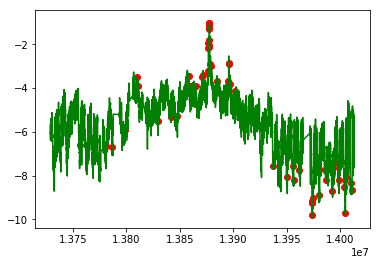

In [53]:
fig, ax = plt.subplots()

a = df1.loc[df1['anomalies'] == 1, ['time_epoch', 'value']] #anomaly

ax.plot(df1['time_epoch'], df1['value'], color='green')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()
